In [ ]:
"""
requirements:
numpy
matplotlib
"""

In [1]:
"""
Questions 1
Describe the following concepts using your own words. Write less than one tweet per topic.
search space
cost or objective function
local optima
global optima
metaheuristic

Search Space:
From book: A space that contains all admissible solutions of the problem - meaning that these solutions input to cost function and adhere to constraints of the problem.

From me: All solutions searchable under constraints of the problem that can be pass to objective function to get some fitness value and among these solutions, there should be a solution which meet the objective function best.


Cost or objective function:
Cost/objective function ,also known as energy function in physics or fitness function, is a function that take in a solution (could be a value or a list or a vector of real numbers) and give out a real number. The function normally should be continuous and differentiable and has a global minimum/maximum depending on the problem.

Local Optima:
A solution x which when passed to first-order partial derivative of f(x) gives 0 - the tangent is parallel to the x axis - while the 2nd derivative of f(x) tells if x is a maxima or minima. This solution x is called local optima since it's highest/lowest among its neighbours but not necessarily the whole search space.

Global Optima:
Solution x which gives the highest or lowest value when passed to f(x) with properties as described in local optima answer.

Metaheuristics:
A group of algorithms that is intended to solve problems that are equal to or as hard as NP-Hard (difficult problems that cannot be solved in polynomial time) problems via the usage of search, cost function, and approximation in order to give a 'Good Enough' result in a reasonable (polynomial) time.
"""
# hel
print("Question1 Cell")

Question1 Cell


In [2]:
"""
Question 2 Code - you can read some line comments if you are interested.
minimize python function float to float
"""
import math
import matplotlib.pyplot as plt
import numpy as np
import random

def my_function(x):
    return 0.1*x**2 + 10*math.sin(3*x)

def visualize_single_var_function_with_points(function, lower_bound, upper_bound, granularity=1000., points=None, title=None):
    """
    :param function: function to minimize
    :param lower_bound:
    :param upper_bound:
    :param granularity: how many points to point to visualize the function
    :param points: minimal points to point to see where our best minimal points are
    :param title: title of the plot
    :return:
    """
    xs = np.arange(lower_bound, upper_bound, (upper_bound-lower_bound)/granularity)
    ys = np.array([function(i) for i in xs])
    plt.figure()
    plt.plot(xs, ys, linestyle='-')
    if points is not None:
        ypoints = np.array([function(x) for x in points])
        plt.plot(points, ypoints, 'o')
    if points is None:
        points = []
    if title is None:
        "Visualized Function with {} points".format(len(points))
    plt.title(title)
    plt.show()

def probabilistic_hill_climber_single_var_minimize_version(function, x, lower_bound, upper_bound, step_size_min = 0.1, step_size_max = 2.5, best_prob=0.8):
    """
    1 step of minimize via custom probabilistic hill climbing
    Since we assume single variable, we have 2 possible moves left or right
    Since we save the best move, we do not have to worry about staying in place (initially there was 3 variables, left right stay)
    :param function: function to minimize
    :param x: current x value in search space
    :param lower_bound: lower bound of search space
    :param upper_bound: upper bound of search space
    :param step_size_min: minimum step size to random from
    :param step_size_max: maximum step size to random from
    :param best_prob: probability of selecting the minimal function(x)
    :return:
    """
    assert upper_bound != lower_bound, "upper bound should not be equal to lower bound"
    assert upper_bound > lower_bound, "upper bound should be more than lower bound"
    assert step_size_max >= step_size_min, "max step size should be more than min step size"
    assert best_prob  <= 0.9, "Worst prob needs to be at least 0.1"
    step_size = random.uniform(step_size_min, step_size_max)
    def get_neighbors(xx):
        return xx-step_size, xx+step_size
    # under normal circumstances
    # probabilistic hill climber would use, proportion of worse value
    # since we can't guarantee that the value less than 0 doesn't exist
    # we fix our probability of worse step getting chosen.
    # we also need to take into consideration of current x being optimal
    # so there are 3 values to be considered here
    # we split it into 3 ways best, medium, worst: 0.5, 0.3, 0.2 respectively
    # basically i'm doing this because i'm too lazy to make a proportional
    # probability function for different value because I dont know how.
    leftx, rightx = get_neighbors(x)
    # if we are at boundary, we switch left to further to right
    if leftx < lower_bound:
        leftx = rightx + step_size
    if rightx > upper_bound:
        rightx = leftx - step_size
    # now that we saved the best - we don't need to contemplate staying at x
    all_x = [leftx, rightx]
    all_valx = [(i, function(i)) for i in all_x]
    # since it's minimize, the sort should go with lowest value as best
    all_valx = sorted(all_valx, key=lambda tup: tup[1])
    r = random.uniform(0, 1)
    # medium_prob = 1-best_prob-worst_prob
    probs = [best_prob, 1]
    probs = np.cumsum(probs)
    for i in range(len(probs)):
        if r < probs[i]:
            return all_valx[i][0]
    raise Exception('Should not be reached')


def minimize_single_var(function, lower_bound, upper_bound, max_iter, print_all_result=False) -> float:
    """
    :param function: functions to minimize
    :param lower_bound: lower_bound value to search in search space
    :param upper_bound: upper_bound value to search in search space
    :param max_iter: maximum number of steps to run before terminating
    :param print_all_result: print the start point, end point, and best point - we only return best point so this is basically for debugging
    :return: x with lowest value from function(x)
    """
    sx = random.uniform(lower_bound, upper_bound)
    cx = sx
    # save lowest x
    bx = cx
    vx = function(bx)
    for i in range(max_iter):
        cx = probabilistic_hill_climber_single_var_minimize_version(function, cx, lower_bound, upper_bound)
        vcx = function(cx)
        if vcx < vx:
            bx = cx
            vx = vcx
    if print_all_result:
        print("started at {:.4f} and ended at {:.4f} and best at {:.4f}".format(sx, cx, bx))
    return bx


# visualize_single_var_function(my_function, -100., 100.)
# step size has a lot of influence on amount of budget required to get to minimum
# in fact step size HAS A HUGE INFLUENCE on getting to the minimal point
# originally we perform a fixed step size, after experimentation
# It does get best locations but it's not that great - we have variations from -10 to 10 for budget of 1000 steps
# so what i did was to vary step size from (0.1, 2) per step
# this allows us to consistently get -1 to 1 for budget of 1000 steps
# In fact, 500 is also  possible to get good optimal x most of the time (95% probably).
# 250 is where we start to get in the range of -5 to 5 if we started at points far away from optimal (80% probably)
minimize_single_var(my_function, -100, 100, 250)

-0.5484164581718549

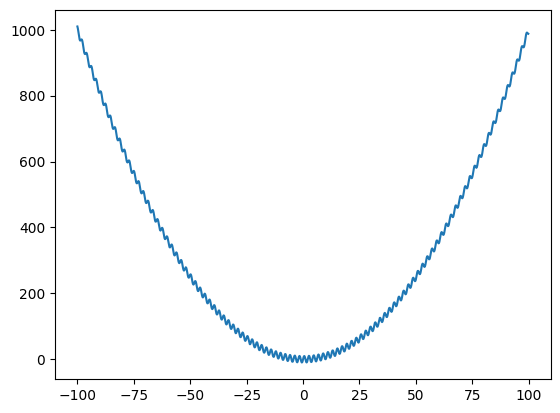

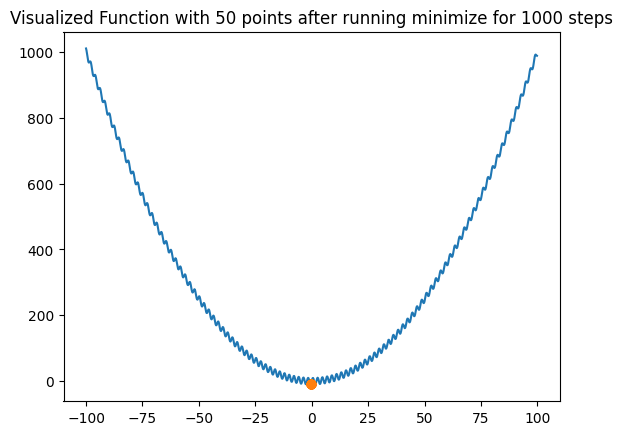

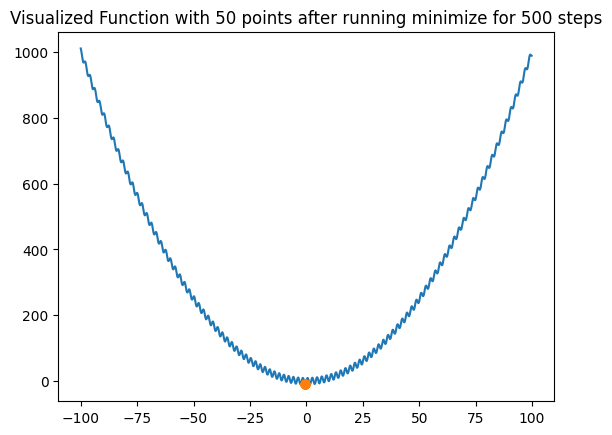

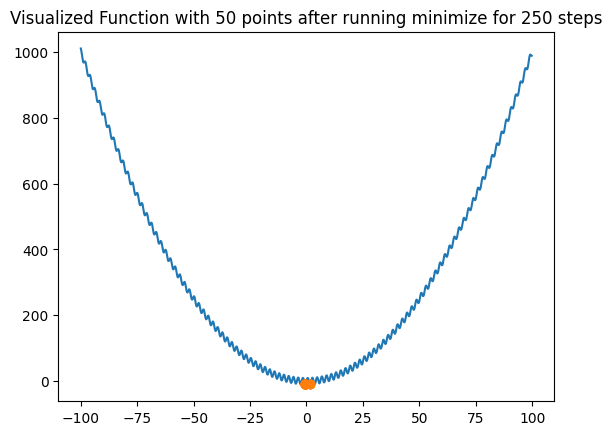

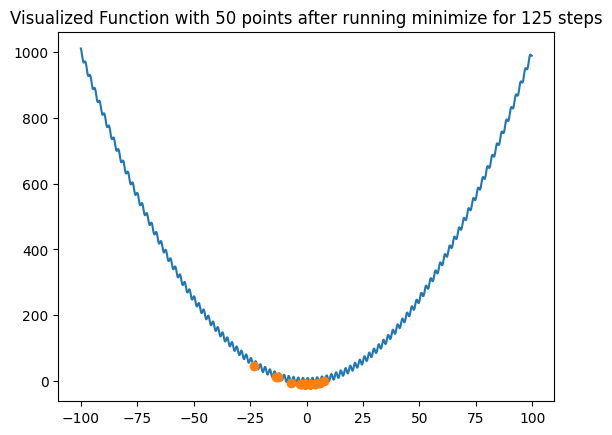

In [3]:
"""
Question 2 answers and visualization
What I did is visualize the location where my minimize function value
spit out.

So i did the following
1. plot original function
2. plot original function with 50 minimized points after running 1k steps each
3. plot original function with 50 minimized points after running 500 steps each
4. plot original function with 50 minimized points after running 250 steps each
5. plot original function with 50 minimized points after running 250 steps each
6. plot original function with 50 minimized points after running 125 steps each

The best technique is the following
Both of these are important but random step size allows us to consistently
get pass through the optimal point.
1. remember the best/minimal point
2. random step size - this allows us to explore more area and also jump around faster - it's the best of both world really.
3. left and right neighbors only - Initial result i had did not take into consideration that I got the best result before, so i wanted neighbor to have a chance to stay at x. However, with 1 implementation, we can get optimal solution almost every time if we remoev option to stay at x since we can now explore more often.

Search Technique detail
1. follow probabilistic hill climbing
2. instead of proportional probability to get out we fixed the probability of best(least function value), medium, and worst.
3. this allows for negative function value
4. instead of force moving, I also allows the value to stay at the recent point
5. randomize step size --> found to be very good and get to the minimal point easily (sometimes the step size is too big over step, too small cant reach)
"""
NPOINTS = 50
# visualize the original function
visualize_single_var_function_with_points(my_function, -100., 100.)
# minimize with 1k steps for 10 points
points = []
steps = 1000
for i in range(NPOINTS):
    points.append(minimize_single_var(my_function, -100, 100, steps))
title = 'Visualized Function with {} points after running minimize for {} steps'.format(len(points), steps)
visualize_single_var_function_with_points(my_function, -100., 100., points=points,
                                          title=title)
# minimize with 500 steps for 10 points
points = []
steps = 500
for i in range(NPOINTS):
    points.append(minimize_single_var(my_function, -100, 100, steps))
title = 'Visualized Function with {} points after running minimize for {} steps'.format(len(points), steps)
visualize_single_var_function_with_points(my_function, -100., 100., points=points,
                                          title=title)
# minimize with 250 steps for 10 points
points = []
steps = 250
for i in range(NPOINTS):
    points.append(minimize_single_var(my_function, -100, 100, steps))
title = 'Visualized Function with {} points after running minimize for {} steps'.format(len(points), steps)
visualize_single_var_function_with_points(my_function, -100., 100., points=points,
                                          title=title)
# minimize with 125 steps for 10 points
points = []
steps = 125
for i in range(NPOINTS):
    points.append(minimize_single_var(my_function, -100, 100, steps))
title = 'Visualized Function with {} points after running minimize for {} steps'.format(len(points), steps)
visualize_single_var_function_with_points(my_function, -100., 100., points=points,
                                          title=title)


In [4]:
"""
Question 3
Answer for first question:
Initial thoughts
While the test cases and execution seem like the search space, they're not.
What we really do is that we have to find combinations of test cases that fits the constraint time and maximize code coverage .

So our search space is correct combinations of (t1, t2, t3).
We can represent this as 3 booleans string 000 --> each respective boolean location index represent the respective index.

So our search space is B^3 = 8 where B is boolean.

Now we have our search space B^3 and element x in B^3.

Since we have defined search space as boolean string, we can make boolean hypercube to do neighbor search like the book described. Easy (not really)!
Or obviously we define this as integer programming problem where we optimize for



-------------------------------------------------------------------------------

Answer for second Question

Making Optimization function (1)
We are going to continue using probabilistic hill climbing (cus why not).
This one is hard because there's the constraint of maximum time that has been put on.
Under normal circumstances I would just do integer programming and be done with it.
But since we just finish the topic of search space I would like to do something more fancy (does not mean that it's right).
In addition, the search space is very pretty.
So the objective function is very simple.
There are 2 cases - solutions that are possible, and solutions that are not possible.
We put solutions that are not possible into negative based on how much time it exceed the maximum constraint.
With boolean search space we also have the benefit of '000' configuration which means that no solution is found, this element has code coverage of 0 and therefore return 0 for this objective function
For solutions that are possible, the fitness value is the number of unique code coverage.
Therefore, this search space and objective function (with penalty i mentioned) allow us to create an effective objective function.
It also works with probabilistic hill climbing just adjusted to different type of search space.


I'm quite sure that this is also solvable using linear programming.
I'm just quite unsure how to transform our functions to something linear - it might not be possible?
because this looks very juicy to represent as each task as x1, x2, x3
However, the issue with this is that there's no way to represent union(task(x1), task(x2)).
the relationship here is not linear and there's probably no way to represent it linearly.
So maybe probabilistic hill climbing is the correct way.
"""



PER_TASK_TIME_MAPPING = {
    0: 2,
    1: 4,
    2: 3
}
PER_TASK_CC_MAPPING = {
    0: {1,2,5,6,7},
    1: {1,3,10,11,12},
    2: {1,3,5},
}

# we can precompute this but i'm lazy
def time(x):
    assert isinstance(x, str), "x is not string"
    assert len(x) == len(PER_TASK_TIME_MAPPING), "only support string of len {}".format(len(PER_TASK_TIME_MAPPING))
    total_time = 0
    for i in range(len(x)):
        if x[i] == '1':
            total_time += PER_TASK_TIME_MAPPING[i]
        elif x[i] != '0':
            raise Exception('x is not boolean string!')
    return total_time

# we can also precompute this but i'm lazy
def code_coverage(x):
    assert isinstance(x, str), "x is not string"
    assert len(x) == len(PER_TASK_CC_MAPPING), "only support string of len {}".format(len(PER_TASK_CC_MAPPING))
    covered = set()
    for i in range(len(x)):
        if x[i] == '1':
            covered = covered.union(PER_TASK_CC_MAPPING[i])
        elif x[i] != '0':
            raise Exception('x is not boolean string!')
    return len(covered)

def penalty_function_one(val):
    return 0 - val

def objective_function(x,
                       max_time_constraint,
                       penalty_function=penalty_function_one) -> int:
    """
    :param x:
    :param max_time_constraint:
    :param penalty_function: penalty function to enforce the max_time_constraint on search space.
    :return: number of code coverage, return negative value if does not pass max time constraint
    """
    assert max_time_constraint >= 0, 'Negative time constraint is not allowed, 0 means no config will be selected'
    total_time = time(x)
    total_coverage = code_coverage(x)
    if total_time > max_time_constraint:
        return penalty_function(total_time-max_time_constraint)
    return total_coverage


def hill_climb_binary_hypercube(function, x, max_time_constraint, best_prob=0.5):
    def get_neighbors(xx):
        new_neighbors = []
        for i in range(len(xx)):
            nstr = str(xx)
            if nstr[i] == '1':
                nstr = nstr[:i] + '0' + nstr[i+1:] if i+1 < len(nstr) else  nstr[:i] + '0'
            else:
                nstr = nstr[:i] + '1' + nstr[i+1:] if i+1 < len(nstr) else  nstr[:i] + '1'
            new_neighbors.append(nstr)
        return new_neighbors
    # we should be getting 3 neighbors, so just choose
    neighbors = get_neighbors(x)
    vals = [(i, function(i, max_time_constraint)) for i in neighbors]
    # sort by value from max to min
    neighbor_vals = sorted(vals, key=lambda tup: tup[1], reverse=True)
    rest_prob = 1-best_prob
    # equal prob on the non-max points
    rest_prob = rest_prob/float(len(x)-1)
    probs = [best_prob]
    for i in range(len(x)-1):
        probs.append(rest_prob)
    probs = np.cumsum(probs)
    r = random.uniform(0, probs[-1]) # in some case the last prob might not be 1 but 0.9999999999
    for i in range(len(probs)):
        if r < probs[i]:
            return neighbor_vals[i][0]
    raise Exception('Should not be reached')


def maximize_in_bthree_search_space(function,
                                    max_iter=20,
                                    max_time_constraint=2):
    """
    :param function: function to maximize, should return integer
    :param max_iter:
    :param max_time_constraint: time constraint
    :return:
    """
    # randomize x
    x = "{}{}{}".format(random.randint(0, 1),
                        random.randint(0, 1),
                        random.randint(0, 1))
    best_x = str(x)
    best_val = function(best_x, max_time_constraint)
    for i in range(max_iter):
        new_x = hill_climb_binary_hypercube(function,
                                            x,
                                            max_time_constraint)
        new_val = function(new_x, max_time_constraint)
        if new_val > best_val:
            best_x = new_x
            best_val = new_val
        x = new_x
    return best_x

In [17]:
#  000 means that none of the configuration fits the constraints
maximize_in_bthree_search_space(objective_function,
                                max_iter=20,
                                max_time_constraint=5)

'101'

In [ ]:
# let's visualize how different max_time_constraint lead to different fitness value
# we keep the iteration to be about 20 - which is kinda too much but that's ok we want it to achieve optimal
mts = list(range(20))
miter = 20
for i in mts:#%%
"""
Questions 1
Describe the following concepts using your own words. Write less than one tweet per topic.
search space
cost or objective function
local optima
global optima
metaheuristic

Search Space:
From book: A space that contains all admissible solutions of the problem - meaning that these solutions input to cost function and adhere to constraints of the problem.

From me: All solutions searchable under constraints of the problem that can be pass to objective function to get some fitness value and among these solutions, there should be a solution which meet the objective function best.


Cost or objective function:
Cost/objective function ,also known as energy function in physics or fitness function, is a function that take in a solution (could be a value or a list or a vector of real numbers) and give out a real number. The function normally should be continuous and differentiable and has a global minimum/maximum depending on the problem.

Local Optima:
A solution x which when passed to first-order partial derivative of f(x) gives 0 - the tangent is parallel to the x axis - while the 2nd derivative of f(x) tells if x is a maxima or minima. This solution x is called local optima since it's highest/lowest among its neighbours but not necessarily the whole search space.

Global Optima:
Solution x which gives the highest or lowest value when passed to f(x) with properties as described in local optima answer.

Metaheuristics:
A group of algorithms that is intended to solve problems that are equal to or as hard as NP-Hard (difficult problems that cannot be solved in polynomial time) problems via the usage of search, cost function, and approximation in order to give a 'Good Enough' result in a reasonable (polynomial) time.
"""
# hel
print("Question1 Cell")

In [ ]:
"""
Question 2 Code - you can read some line comments if you are interested.
minimize python function float to float
"""
import math
import matplotlib.pyplot as plt
import numpy as np
import random

def my_function(x):
    return 0.1*x**2 + 10*math.sin(3*x)

def visualize_single_var_function_with_points(function, lower_bound, upper_bound, granularity=1000., points=None, title=None):
    """
    :param function: function to minimize
    :param lower_bound:
    :param upper_bound:
    :param granularity: how many points to point to visualize the function
    :param points: minimal points to point to see where our best minimal points are
    :param title: title of the plot
    :return:
    """
    xs = np.arange(lower_bound, upper_bound, (upper_bound-lower_bound)/granularity)
    ys = np.array([function(i) for i in xs])
    plt.figure()
    plt.plot(xs, ys, linestyle='-')
    if points is not None:
        ypoints = np.array([function(x) for x in points])
        plt.plot(points, ypoints, 'o')
    if points is None:
        points = []
    if title is None:
        "Visualized Function with {} points".format(len(points))
    plt.title(title)
    plt.show()

def probabilistic_hill_climber_single_var_minimize_version(function, x, lower_bound, upper_bound, step_size_min = 0.1, step_size_max = 2.5, best_prob=0.8):
    """
    1 step of minimize via custom probabilistic hill climbing
    Since we assume single variable, we have 2 possible moves left or right
    Since we save the best move, we do not have to worry about staying in place (initially there was 3 variables, left right stay)
    :param function: function to minimize
    :param x: current x value in search space
    :param lower_bound: lower bound of search space
    :param upper_bound: upper bound of search space
    :param step_size_min: minimum step size to random from
    :param step_size_max: maximum step size to random from
    :param best_prob: probability of selecting the minimal function(x)
    :return:
    """
    assert upper_bound != lower_bound, "upper bound should not be equal to lower bound"
    assert upper_bound > lower_bound, "upper bound should be more than lower bound"
    assert step_size_max >= step_size_min, "max step size should be more than min step size"
    assert best_prob  <= 0.9, "Worst prob needs to be at least 0.1"
    step_size = random.uniform(step_size_min, step_size_max)
    def get_neighbors(xx):
        return xx-step_size, xx+step_size
    # under normal circumstances
    # probabilistic hill climber would use, proportion of worse value
    # since we can't guarantee that the value less than 0 doesn't exist
    # we fix our probability of worse step getting chosen.
    # we also need to take into consideration of current x being optimal
    # so there are 3 values to be considered here
    # we split it into 3 ways best, medium, worst: 0.5, 0.3, 0.2 respectively
    # basically i'm doing this because i'm too lazy to make a proportional
    # probability function for different value because I dont know how.
    leftx, rightx = get_neighbors(x)
    # if we are at boundary, we switch left to further to right
    if leftx < lower_bound:
        leftx = rightx + step_size
    if rightx > upper_bound:
        rightx = leftx - step_size
    # now that we saved the best - we don't need to contemplate staying at x
    all_x = [leftx, rightx]
    all_valx = [(i, function(i)) for i in all_x]
    # since it's minimize, the sort should go with lowest value as best
    all_valx = sorted(all_valx, key=lambda tup: tup[1])
    r = random.uniform(0, 1)
    # medium_prob = 1-best_prob-worst_prob
    probs = [best_prob, 1]
    probs = np.cumsum(probs)
    for i in range(len(probs)):
        if r < probs[i]:
            return all_valx[i][0]
    raise Exception('Should not be reached')


def minimize_single_var(function, lower_bound, upper_bound, max_iter, print_all_result=False) -> float:
    """
    :param function: functions to minimize
    :param lower_bound: lower_bound value to search in search space
    :param upper_bound: upper_bound value to search in search space
    :param max_iter: maximum number of steps to run before terminating
    :param print_all_result: print the start point, end point, and best point - we only return best point so this is basically for debugging
    :return: x with lowest value from function(x)
    """
    sx = random.uniform(lower_bound, upper_bound)
    cx = sx
    # save lowest x
    bx = cx
    vx = function(bx)
    for i in range(max_iter):
        cx = probabilistic_hill_climber_single_var_minimize_version(function, cx, lower_bound, upper_bound)
        vcx = function(cx)
        if vcx < vx:
            bx = cx
            vx = vcx
    if print_all_result:
        print("started at {:.4f} and ended at {:.4f} and best at {:.4f}".format(sx, cx, bx))
    return bx


# visualize_single_var_function(my_function, -100., 100.)
# step size has a lot of influence on amount of budget required to get to minimum
# in fact step size HAS A HUGE INFLUENCE on getting to the minimal point
# originally we perform a fixed step size, after experimentation
# It does get best locations but it's not that great - we have variations from -10 to 10 for budget of 1000 steps
# so what i did was to vary step size from (0.1, 2) per step
# this allows us to consistently get -1 to 1 for budget of 1000 steps
# In fact, 500 is also  possible to get good optimal x most of the time (95% probably).
# 250 is where we start to get in the range of -5 to 5 if we started at points far away from optimal (80% probably)
minimize_single_var(my_function, -100, 100, 250)

In [ ]:
"""
Question 2 answers and visualization
What I did is visualize the location where my minimize function value
spit out.

So i did the following
1. plot original function
2. plot original function with 50 minimized points after running 1k steps each
3. plot original function with 50 minimized points after running 500 steps each
4. plot original function with 50 minimized points after running 250 steps each
5. plot original function with 50 minimized points after running 250 steps each
6. plot original function with 50 minimized points after running 125 steps each

The best technique is the following
Both of these are important but random step size allows us to consistently
get pass through the optimal point.
1. remember the best/minimal point
2. random step size - this allows us to explore more area and also jump around faster - it's the best of both world really.
3. left and right neighbors only - Initial result i had did not take into consideration that I got the best result before, so i wanted neighbor to have a chance to stay at x. However, with 1 implementation, we can get optimal solution almost every time if we remoev option to stay at x since we can now explore more often.

Search Technique detail
1. follow probabilistic hill climbing
2. instead of proportional probability to get out we fixed the probability of best(least function value), medium, and worst.
3. this allows for negative function value
4. instead of force moving, I also allows the value to stay at the recent point
5. randomize step size --> found to be very good and get to the minimal point easily (sometimes the step size is too big over step, too small cant reach)
"""
NPOINTS = 50
# visualize the original function
visualize_single_var_function_with_points(my_function, -100., 100.)
# minimize with 1k steps for 10 points
points = []
steps = 1000
for i in range(NPOINTS):
    points.append(minimize_single_var(my_function, -100, 100, steps))
title = 'Visualized Function with {} points after running minimize for {} steps'.format(len(points), steps)
visualize_single_var_function_with_points(my_function, -100., 100., points=points,
                                          title=title)
# minimize with 500 steps for 10 points
points = []
steps = 500
for i in range(NPOINTS):
    points.append(minimize_single_var(my_function, -100, 100, steps))
title = 'Visualized Function with {} points after running minimize for {} steps'.format(len(points), steps)
visualize_single_var_function_with_points(my_function, -100., 100., points=points,
                                          title=title)
# minimize with 250 steps for 10 points
points = []
steps = 250
for i in range(NPOINTS):
    points.append(minimize_single_var(my_function, -100, 100, steps))
title = 'Visualized Function with {} points after running minimize for {} steps'.format(len(points), steps)
visualize_single_var_function_with_points(my_function, -100., 100., points=points,
                                          title=title)
# minimize with 125 steps for 10 points
points = []
steps = 125
for i in range(NPOINTS):
    points.append(minimize_single_var(my_function, -100, 100, steps))
title = 'Visualized Function with {} points after running minimize for {} steps'.format(len(points), steps)
visualize_single_var_function_with_points(my_function, -100., 100., points=points,
                                          title=title)


In [29]:
"""
Question 3
Answer for first question in Question 3:
Initial thoughts
While the test cases and execution seem like the search space, they're not.
What we really do is that we have to find combinations of test cases that fits the constraint time and maximize code coverage .

So our search space is correct combinations of (t1, t2, t3).
We can represent this as 3 booleans string 000 --> each respective boolean location index represent the respective index.

So our search space is B^3 = 8 where B is boolean.

Now we have our search space B^3 and element x in B^3.

Since we have defined search space as boolean string, we can make boolean hypercube to do neighbor search like the book described. Easy (not really)!
Or obviously we define this as integer programming problem where we optimize for



-------------------------------------------------------------------------------

Answer for second question in Question 3 (implementation below)

Making Optimization function (1)
We are going to continue using probabilistic hill climbing (cus why not).
This one is hard because there's the constraint of maximum time that has been put on.
Under normal circumstances I would just do integer programming and be done with it.
But since we just finish the topic of search space I would like to do something more fancy (does not mean that it's right).
In addition, the search space is very pretty.
So the objective function is very simple.
There are 2 cases - solutions that are possible, and solutions that are not possible.
We put solutions that are not possible into negative based on how much time it exceed the maximum constraint.
With boolean search space we also have the benefit of '000' configuration which means that no solution is found, this element has code coverage of 0 and therefore return 0 for this objective function
For solutions that are possible, the fitness value is the number of unique code coverage.
Therefore, this search space and objective function (with penalty i mentioned) allow us to create an effective objective function.
It also works with probabilistic hill climbing just adjusted to different type of search space.


I'm quite sure that this is also solvable using linear programming.
I'm just quite unsure how to transform our functions to something linear - it might not be possible?
because this looks very juicy to represent as each task as x1, x2, x3
However, the issue with this is that there's no way to represent union(task(x1), task(x2)).
the relationship here is not linear and there's probably no way to represent it linearly.
So maybe probabilistic hill climbing is the correct way.
"""
PER_TASK_TIME_MAPPING = {
    0: 2,
    1: 4,
    2: 3
}
PER_TASK_CC_MAPPING = {
    0: {1,2,5,6,7},
    1: {1,3,10,11,12},
    2: {1,3,5},
}

# we can precompute this but i'm lazy
def time(x):
    assert isinstance(x, str), "x is not string"
    assert len(x) == len(PER_TASK_TIME_MAPPING), "only support string of len {}".format(len(PER_TASK_TIME_MAPPING))
    total_time = 0
    for i in range(len(x)):
        if x[i] == '1':
            total_time += PER_TASK_TIME_MAPPING[i]
        elif x[i] != '0':
            raise Exception('x is not boolean string!')
    return total_time

# we can also precompute this but i'm lazy
def code_coverage(x):
    assert isinstance(x, str), "x is not string"
    assert len(x) == len(PER_TASK_CC_MAPPING), "only support string of len {}".format(len(PER_TASK_CC_MAPPING))
    covered = set()
    for i in range(len(x)):
        if x[i] == '1':
            covered = covered.union(PER_TASK_CC_MAPPING[i])
        elif x[i] != '0':
            raise Exception('x is not boolean string!')
    return len(covered)

def penalty_function_one(val):
    return 0 - val

def objective_function(x,
                       max_time_constraint,
                       penalty_function=penalty_function_one) -> int:
    """
    :param x:
    :param max_time_constraint:
    :param penalty_function: penalty function to enforce the max_time_constraint on search space.
    :return: number of code coverage, return negative value if does not pass max time constraint
    """
    assert max_time_constraint >= 0, 'Negative time constraint is not allowed, 0 means no config will be selected'
    total_time = time(x)
    total_coverage = code_coverage(x)
    if total_time > max_time_constraint:
        return penalty_function(total_time-max_time_constraint)
    return total_coverage


def hill_climb_binary_hypercube(function, x, max_time_constraint, best_prob=0.5):
    def get_neighbors(xx):
        new_neighbors = []
        for i in range(len(xx)):
            nstr = str(xx)
            if nstr[i] == '1':
                nstr = nstr[:i] + '0' + nstr[i+1:] if i+1 < len(nstr) else  nstr[:i] + '0'
            else:
                nstr = nstr[:i] + '1' + nstr[i+1:] if i+1 < len(nstr) else  nstr[:i] + '1'
            new_neighbors.append(nstr)
        return new_neighbors
    # we should be getting 3 neighbors, so just choose
    neighbors = get_neighbors(x)
    vals = [(i, function(i, max_time_constraint)) for i in neighbors]
    # sort by value from max to min
    neighbor_vals = sorted(vals, key=lambda tup: tup[1], reverse=True)
    rest_prob = 1-best_prob
    # equal prob on the non-max points
    rest_prob = rest_prob/float(len(x)-1)
    probs = [best_prob]
    for i in range(len(x)-1):
        probs.append(rest_prob)
    probs = np.cumsum(probs)
    r = random.uniform(0, probs[-1]) # in some case the last prob might not be 1 but 0.9999999999
    for i in range(len(probs)):
        if r < probs[i]:
            return neighbor_vals[i][0]
    raise Exception('Should not be reached')


def maximize_in_bthree_search_space(function,
                                    max_iter=20,
                                    max_time_constraint=2):
    """
    :param function: function to maximize, should return integer
    :param max_iter:
    :param max_time_constraint: time constraint
    :return:
    """
    # randomize x
    x = "{}{}{}".format(random.randint(0, 1),
                        random.randint(0, 1),
                        random.randint(0, 1))
    best_x = str(x)
    best_val = function(best_x, max_time_constraint)
    for i in range(max_iter):
        new_x = hill_climb_binary_hypercube(function,
                                            x,
                                            max_time_constraint)
        new_val = function(new_x, max_time_constraint)
        if new_val > best_val:
            best_x = new_x
            best_val = new_val
        x = new_x
    if best_val < 0:
        return '000' # default 000 if no solution found
    return best_x

In [30]:
#  000 means that none of the configuration fits the constraints
maximize_in_bthree_search_space(objective_function,
                                max_iter=20,
                                max_time_constraint=5)

'101'

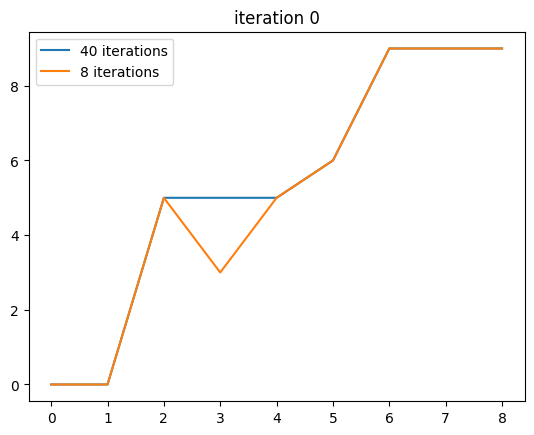

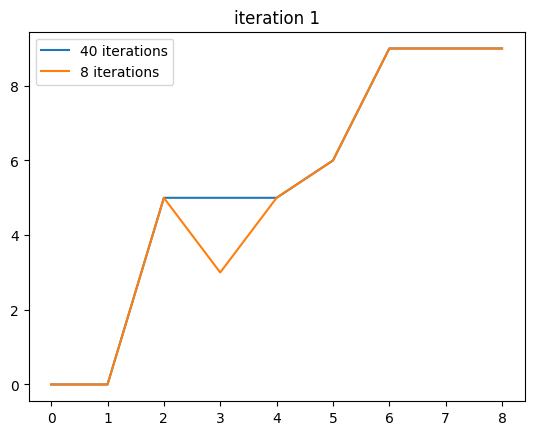

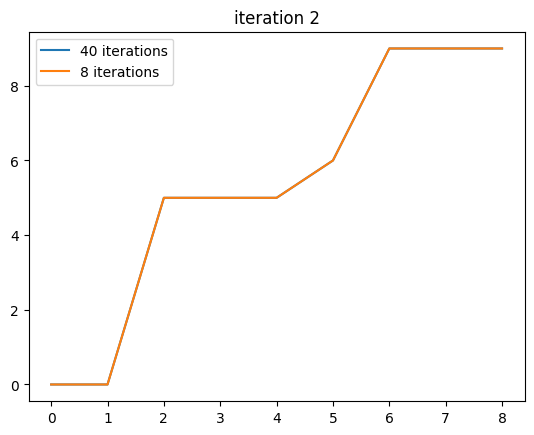

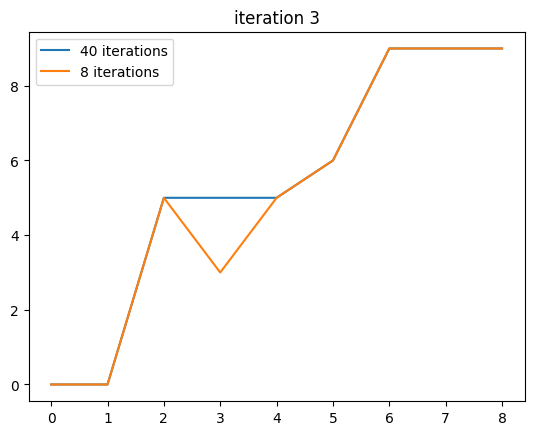

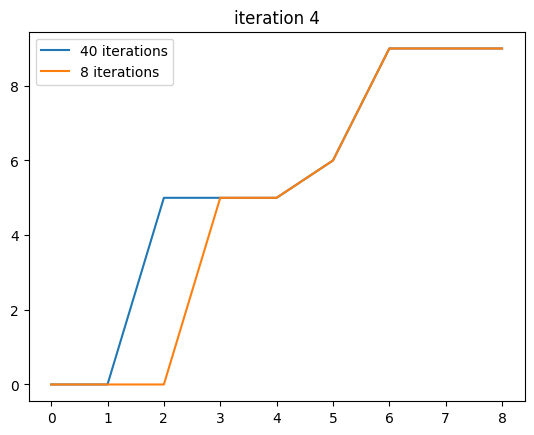

In [43]:
"""
let's visualize how different max_time_constraint lead to different fitness value
we keep the iteration to be about 40 - which is kinda too much but that's ok we want it to achieve optimal
we also run against 8

we also rerun this for 5 times to see how 8 iterations line vary itself while 40 iterations line is very stable.
"""
for j in range(5):
    plt.figure()
    mts = list(range(sum(PER_TASK_TIME_MAPPING.values())))
    bvals = []
    miter = 40
    for i in mts:
        best_string = maximize_in_bthree_search_space(objective_function,
                                                        max_iter=miter,
                                                        max_time_constraint=i)
        bvals.append(objective_function(best_string, max_time_constraint=i))
    plt.plot(mts, bvals, '-')

    mts = list(range(sum(PER_TASK_TIME_MAPPING.values())))
    bvals = []
    miter = 8
    for i in mts:
        best_string = maximize_in_bthree_search_space(objective_function,
                                                      max_iter=miter,
                                                      max_time_constraint=i)
        bvals.append(objective_function(best_string, max_time_constraint=i))
    plt.plot(mts, bvals, '-')
    plt.legend(['40 iterations', '8 iterations'])
    plt.title('iteration {}'.format(j))